<a href="https://colab.research.google.com/github/kamto101/Data-Analysis-Portfolio/blob/main/Analysis_of_IMDB_movie_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of IMDB movie data**

**Summary of business task**

Sussexbudgetproductions is a company that produces movies. As a data scientist working for sussexbudgetproductions. I have been instructed to carry out an extensive analysis on the IMBD data and draw actionable insights which will increase the gross earnings of the next movie sussexproductions produces.

**Data Collection**


How was the data stored? the data was stored in a zip folder in a csv file format.
Data tools used: Python was used in data exploration, data cleaning, data analysis and visualization. Python was also used to conduct hypothesis testing

**Research methods** 


The dataset will be divided into two, training data and testing data. Training data will be used to conduct data analysis. Testing data will be used to conduct hypothesis Testing. The data will be split into two to avoid elimination bias.

In [ ]:
#import the file from google drive to the notebook to begin analysis
from google.colab import drive
drive.mount('/content/drive')
input_file_path='/content/drive/My Drive/DSRM_Notebooks/movie_metadata.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#To begin our analysis, i will import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import random

In [ ]:
#To read the file into a list
import csv 

with open(input_file_path, 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    rows = list(csv_reader)
    print(rows[0])

['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']


In [ ]:
#This is to delete the header column before splitting the data 
rows.pop(0)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [ ]:
random.seed(81)  #set random seed so the results can be replicated
random.shuffle(rows)
midpoint=len(rows)//2
devlist=rows[:midpoint]
testlist=rows[midpoint:]
print(devlist[0])
print(testlist[0])

['Color', 'Andrew Morahan', '32', '99', '5', '535', 'Mako', '1000', '13829734', 'Action|Fantasy|Romance|Sci-Fi', 'Christopher Lambert', 'Highlander: The Final Dimension\xa0', '16194', '2960', 'Mario Van Peebles', '0', 'cave|highlander|illusion|immortal|japan', 'http://www.imdb.com/title/tt0110027/?ref_=fn_tt_tt_1', '79', 'English', 'Canada', 'PG-13', '26000000', '1994', '691', '4.3', '2.35', '319']
['Color', 'Steve Beck', '149', '91', '17', '670', 'Embeth Davidtz', '1000', '41867960', 'Horror', 'Shannon Elizabeth', 'Thir13en Ghosts\xa0', '65512', '3023', 'F. Murray Abraham', '0', 'collector|ghost|ghost hunter|glass house|machine', 'http://www.imdb.com/title/tt0245674/?ref_=fn_tt_tt_1', '478', 'English', 'USA', 'R', '20000000', '2001', '795', '5.5', '1.33', '0']


**Data Exploration**

In this section, i will focus on data exploration and analysis of the training data.  The dataset will be explored and visualized using different libraries in python. 

In [ ]:
movie_data = pd.DataFrame(devlist, columns = ['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes'])

In [ ]:
movie_data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,Andrew Morahan,32,99,5,535,Mako,1000,13829734,Action|Fantasy|Romance|Sci-Fi,...,79,English,Canada,PG-13,26000000,1994,691,4.3,2.35,319
1,Black and White,Stefen Fangmeier,170,104,14,203,Ed Speleers,3000,75030163,Action|Adventure|Family|Fantasy,...,1690,English,USA,PG,100000000,2006,762,5.1,2.35,0
2,Color,Ridley Scott,265,171,0,695,Connie Nielsen,3000,187670866,Action|Drama|Romance,...,2368,English,USA,R,103000000,2000,933,8.5,2.35,21000
3,Color,Jerry Zaks,45,98,4,11000,Robert De Niro,29000,12782508,Drama,...,71,English,USA,PG-13,23000000,1996,22000,6.7,1.85,1000
4,Color,David Gordon Green,232,117,234,919,Gary Cole,11000,87341380,Action|Comedy|Crime,...,374,English,USA,R,27000000,2008,989,7.0,2.35,0


In [ ]:
movie_data.shape

(2521, 28)

In [ ]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2521 entries, 0 to 2520
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   color                      2521 non-null   object
 1   director_name              2521 non-null   object
 2   num_critic_for_reviews     2521 non-null   object
 3   duration                   2521 non-null   object
 4   director_facebook_likes    2521 non-null   object
 5   actor_3_facebook_likes     2521 non-null   object
 6   actor_2_name               2521 non-null   object
 7   actor_1_facebook_likes     2521 non-null   object
 8   gross                      2521 non-null   object
 9   genres                     2521 non-null   object
 10  actor_1_name               2521 non-null   object
 11  movie_title                2521 non-null   object
 12  num_voted_users            2521 non-null   object
 13  cast_total_facebook_likes  2521 non-null   object
 14  actor_3_

**Findings**

From the exploration of the training data, we can see there are 2521 rows and 28 columns. The columns also have the same data type (object).

**Data manipulation and cleaning**

In this section, we will manipulate the dataset to gain a better understanding of the data. data cleaning will also be performed to aid accuarate analysis.


In [ ]:
movie_data[['gross','budget']] = movie_data[['gross','budget']].apply(pd.to_numeric)

In [ ]:
movie_data[['imdb_score']] = movie_data[['imdb_score']].apply(pd.to_numeric)

In [ ]:
movie_data.dtypes

color                         object
director_name                 object
num_critic_for_reviews        object
duration                      object
director_facebook_likes       object
actor_3_facebook_likes        object
actor_2_name                  object
actor_1_facebook_likes        object
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users               object
cast_total_facebook_likes     object
actor_3_name                  object
facenumber_in_poster          object
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews          object
language                      object
country                       object
content_rating                object
budget                       float64
title_year                    object
actor_2_facebook_likes        object
imdb_score                   float64
aspect_ratio                  object
m

In [ ]:
movie_data.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [ ]:
movie_data = movie_data.dropna()

In [ ]:
movie_data = movie_data.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

**Findings**

To gain better insights into the data, the following were performed



1.  Manipulating the data by changing columns from object to float64, 
2.  There were some null values in the dataset. They have been dropped to enable accurate ananlysis.

1.  There were duplicate values in the dataset, they have been removed to aid accurate conclusions of the data analysis.



**Data Analysis and Visualization**

After data cleaning and manipulation, the dataset is now ready for data analysis and visualization. 

Statistical analysis: This will be carried out using the pandas library. This will show the mean, standard deviation, range of the data. 

Data analysis will also be carried out using the groupby function in pandas library. This is done to break our dataset into smaller pieces to get a better understanding of the data. 

Data Visualization: After grouping the data. it will be visualized using barplots and boxplots for a clearer understanding of the variables.

In [ ]:
movie_data.describe()

,gross,budget,imdb_score
count,1.925000e+03,1.925000e+03,1925.000000
mean,5.283787e+07,4.659888e+07,6.447792
std,7.124554e+07,2.862646e+08,1.052609
min,1.620000e+02,1.100000e+03,1.600000
25%,7.262288e+06,1.000000e+07,5.800000
50%,2.897219e+07,2.500000e+07,6.600000
75%,6.694156e+07,5.000000e+07,7.200000
max,6.586723e+08,1.221550e+10,9.000000


From the statistical analysis carried out. we can see the following
1. highest grossing movie is 658,672,300 million pounds sterling
2. highest movie budget is 12,215,500,000 billion pounds sterling
3. highest imdb score is 9.

5. lowest imdb score is 1.6

The statistical analysis gives insight into the data. However i am looking for insight which i can use as my basis for recommendations. further analysis will be conducted.


In [ ]:
content_rating = movie_data.groupby(['content_rating'])[['gross']].apply(sum).reset_index()
content_rating_sorted = content_rating.sort_values('gross', ascending = False)
content_rating_sorted.head()

,content_rating,gross
6,PG-13,4.716418e+10
8,R,2.733522e+10
5,PG,2.217540e+10
2,G,4.610191e+09
1,Approved,2.482000e+08


Text(0.5, 1.0, 'barchart showing the highest grossing content rating in movies')

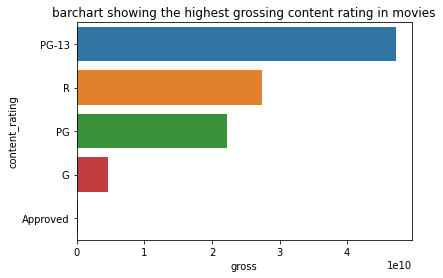

In [ ]:
sns.barplot(x='gross',y = 'content_rating', data = content_rating_sorted.head())
plt.title("barchart showing the highest grossing content rating in movies")

In [ ]:
genres = movie_data.groupby(['genres'])[['gross']].apply(sum).reset_index()
genres_sorted = genres.sort_values('gross',ascending = False)
genres_sorted.head()

,genres,gross
79,Action|Adventure|Sci-Fi,4.296708e+09
319,Comedy,3.544196e+09
80,Action|Adventure|Sci-Fi|Thriller,2.904746e+09
179,Adventure|Animation|Comedy|Family|Fantasy,2.898133e+09
81,Action|Adventure|Thriller,2.842555e+09


Text(0.5, 1.0, 'barchart showing the highest grossing genres in movies')

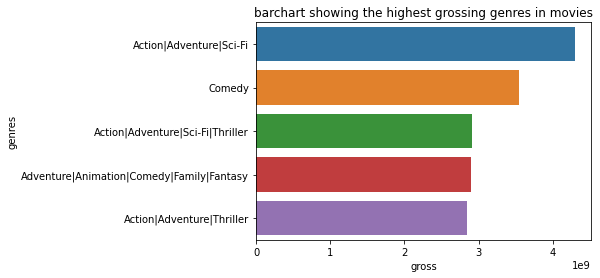

In [ ]:
sns.barplot(x='gross',y = 'genres', data = genres_sorted.head())
plt.title("barchart showing the highest grossing genres in movies")

In [ ]:
budget = movie_data[['movie_title','budget','gross']].sort_values('gross',ascending = False)
budget.head()

,movie_title,budget,gross
1275,Titanic,200000000.0,658672302.0
1467,Jurassic World,150000000.0,652177271.0
21,The Dark Knight,185000000.0,533316061.0
147,Star Wars: Episode I - The Phantom Menace,115000000.0,474544677.0
816,Avengers: Age of Ultron,250000000.0,458991599.0


In [ ]:
highest_grossing_movie = movie_data.nlargest(30,'gross')
highest_grossing_movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1275,Color,James Cameron,315,194,0,794,Kate Winslet,29000,658672302.0,Drama|Romance,...,2528,English,USA,PG-13,200000000.0,1997,14000,7.7,2.35,26000
1467,Color,Colin Trevorrow,644,124,365,1000,Judy Greer,3000,652177271.0,Action|Adventure|Sci-Fi|Thriller,...,1290,English,USA,PG-13,150000000.0,2015,2000,7.0,2.0,150000
21,Color,Christopher Nolan,645,152,22000,11000,Heath Ledger,23000,533316061.0,Action|Crime|Drama|Thriller,...,4667,English,USA,PG-13,185000000.0,2008,13000,9.0,2.35,37000
147,Color,George Lucas,320,136,0,1000,Liam Neeson,20000,474544677.0,Action|Adventure|Fantasy|Sci-Fi,...,3597,English,USA,PG,115000000.0,1999,14000,6.5,2.35,13000
816,Color,Joss Whedon,635,141,0,19000,Robert Downey Jr.,26000,458991599.0,Action|Adventure|Sci-Fi,...,1117,English,USA,PG-13,250000000.0,2015,21000,7.5,2.35,118000


Text(0.5, 1.0, 'Relationship between gross and budget')

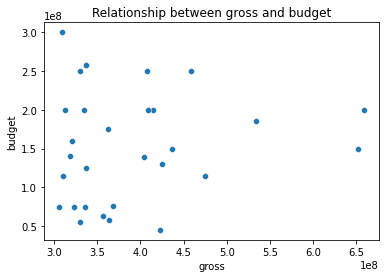

In [ ]:
sns.scatterplot(x=highest_grossing_movie['gross'],y=highest_grossing_movie['budget'])
plt.title("Relationship between gross and budget")

Findings

For the data analysis. we analysed the data in the columns by grouping the columns with the gross column to see the highest gross earnings accumulated. 

The following could be noted from the barplots

1. Some content ratings grossed more earnings than others
2. some genres grossed more earnings than others

In the scatterplots, we noticed there is no correlation between gross and budget.



# **Hypothesis Testing**

**Research background**


Data analysis was conducted on the training data, it gave insights that the content rating on movies has an impact on the gross earnings of the movie. Therefore we want to conduct hypothesis testing through statistical tests to see if content rating has an impact on gross earnings of a movie.

**Research methods**


The data required to test the hypothesis will be the gross earnings of movies with different content ratings. The content ratings will be split into three groups, PG-13,PG and R. The data will be obtained from the testing data, which was originally split out of the IMDB movie dataset.

**Hypothesis Testing**

If content rating is related to gross earnings in movies, then content rating for a larger audience will increase gross earnings in movies.

H0 – Content rating does not have an impact on movie gross earnings

H1 – Content rating has an impact on movie gross earnings

The hypothesis will be tested by carrying out an anova test. The anova test is best suited to test the hypothesis because it will test if there is a statistically significant difference between the subgroups in the dataset.

To conduct anova test, we need to set a significance level. a significance level is the probability of rejecting the null hypothesis. For this test, the significan level will be 0.05. 

To conduct the anova test, we will create data groups. each data group will consist of gross earnings of movies in a particular content rating.

To conduct the anova test, the f statistic will be computed. i will use the scipy library in python to conduct this test.

In [ ]:
from scipy.stats import f_oneway
import pandas as pd
import numpy as np 

In [ ]:
test_data = pd.DataFrame(testlist, columns=['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes'])

In [ ]:
test_data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,Steve Beck,149,91,17,670,Embeth Davidtz,1000,41867960,Horror,...,478,English,USA,R,20000000,2001,795,5.5,1.33,0
1,Color,Vijay Chandar,3,155,0,61,T.R. Silambarasan,141,,Comedy|Romance,...,6,Tamil,India,,150000000,2015,77,5.1,,82
2,Color,Lee Tamahori,77,101,93,218,Nona Gaye,287,26082914,Action|Adventure|Crime|Thriller,...,213,English,USA,PG-13,87000000,2005,233,4.3,2.35,0
3,Color,Joseph Kosinski,4,,364,567,Lauren Cohan,22000,,Action|Adventure|Fantasy|Sci-Fi,...,11,English,USA,,,2014,4000,8.1,,1000
4,Color,Michael Caton-Jones,159,116,105,246,Indira Varma,844,5851188,Crime|Mystery|Thriller,...,313,English,UK,R,70000000,2006,729,4.2,2.35,764


In [ ]:
test_data = test_data.dropna()

In [ ]:
test_data[['gross','budget']] = test_data[['gross','budget']].apply(pd.to_numeric)

In [ ]:
R_rating = test_data[test_data['content_rating']=='R']

In [ ]:
R_rating = R_rating.groupby(['content_rating'])[['gross']]

R_rating.head(10)

,gross
0,41867960.0
4,5851188.0
10,5887457.0
13,2508841.0
15,4485485.0
16,119412921.0
17,2275557.0
21,14100000.0
23,95328937.0
24,15738632.0


In [ ]:
PG13_rating = test_data[test_data['content_rating']=='PG-13']
PG13_rating = PG13_rating.groupby(['content_rating'])[['gross']]
PG13_rating.head(10)

,gross
2,26082914.0
5,133668525.0
9,60655503.0
12,830210.0
20,16264475.0
22,62453315.0
27,33105600.0
28,2024854.0
32,23213577.0
33,48430355.0


In [ ]:
PG_rating = test_data[test_data['content_rating']=='PG']
PG_rating = PG_rating.groupby(['content_rating'])[['gross']]
PG_rating.head(10)

,gross
7,153288182.0
29,55994557.0
30,126247.0
40,90443603.0
47,113006880.0
50,18663911.0
53,66734992.0
69,52320979.0
81,15131330.0
84,82300000.0


In [ ]:
import scipy.stats as stats

In [ ]:
PG_Rating_values = [153288182.0,55994557.0,126247.0,90443603.0,113006880.0,18663911.0,66734992.0,52320979.0,15131330.0,82300000.0]
PG_13_Rating_values =[26082914.0,133668525.0,60655503.0,830210.0,16264475.0,62453315.0,33105600.0,2024854.0,23213577.0,48430355.0]
R_Rating_values = [41867960.0,5851188.0,5887457.0,2508841.0,4485485.0,119412921.0,2275557.0,14100000.0,95328937.0,15738632.0]

In [ ]:
f_oneway(PG_Rating_values,PG_13_Rating_values,R_Rating_values)

F_onewayResult(statistic=1.651119270072955, pvalue=0.21062125458281555)

In [ ]:
import scipy.stats


In [ ]:
scipy.stats.f.ppf(1 - 0.05,2,27)

3.3541308285291986

**Results and Interpretation**

F- statistic = 1.651


F-critical value = 3.3541


pvalue = 0.210


After testing the hypothesis using the anova test. The F-statistic value is less than the F critical value. This means we fail to reject the null hypothesis that content rating has no impact on movie gross earnings.

We set the significance level to 0.05. The pvalue is greater than the significance level. This means the observations is likely to have to have happened by chance. Therefore we fail to reject the null hypothesis that content rating has no impact on movie gross earnings



**Actionable Insights**

From the data analysis and hypothesis testing conducted. i have some recommendations which i believe will increase the earnings of the next movie sussexbudgetproductions produces.


i examined the movie dataset, particularly focused on the two columns genre and content rating, 

1. I think sussexbudgetproductions should produce movies where the content rating is PG_13 because from my analysis. the movies which had this content rating grossed higher earnings compared to other movies that had other content ratings.

2. To increase gross earnings in the next movie sussexbudgetproductions should produce a movie where the genre is Action|Adventure|Sci-Fi. because movies with the genre Action|Adventure|Sci-Fi grossed significantly higher than other movies.